In [1]:
import tweepy

consumerkey = ""
consumersecret = ""
accesstoken = "-"
accesstokensecret = ""

auth = tweepy.OAuthHandler(consumerkey, consumersecret)
auth.set_access_token(accesstoken, accesstokensecret)

api = tweepy.API(auth)

In [7]:
# Cuando queremos conectarnos a al API de Streaming
# Yo me quedo a la escucha y Twitter nos va mandando

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print(status.text)
        
class OnMemoryStreamListener(tweepy.StreamListener):
    def __init__(self, *args, **kwargs):
        super().__init__(*args,**kwargs)
        self.statuses=[]
        
    def on_status (self, status):
        print(status.text)
        self.statuses.append(status)
        
stream_listener = OnMemoryStreamListener()

# Creamos un stream que utilza el listener
stream = tweepy.Stream(
    auth = api.auth, listener = stream_listener
)

try: 
    print('Start streaming')
    stream.filter(track=['fortnite','minecraft'], languages=['es','en'])
except KeyboardInterrupts as e:
    print("Stopped")
finally:
    print('Done')
    stream.disconnect()

Start streaming
@SingularityFN Actually no one cares about that game anymore, valorant fucked everything up by releasing the game w… https://t.co/wNdvBcIM5O
RT @HeavySanGames: Fortnite Season 3 Has Been Delayed Again https://t.co/DVOxhwU3NY https://t.co/kjmmplHFSJ
RT @WCGamingTweets: Minecraft Dungeons' first DLC has been officially revealed, drops in July. 

Details: https://t.co/e1KdHlHt7s #Minecraf…
Minecraft Dungeons Best Armor – Which set should you choose? https://t.co/ZOcUCnkS3d #minecraftdungeons #esrbeveryone #Microsoft #Minecraft
RT @briehive: Lord have mercy, another coon.
RT @BellaDesigner19: #Looking for a #logo ?Hmu
#twitch #fortnite #apexlegend
@SGH_RTs
@ScrimFinder
@BlazedRTs
@TwitchSharing
@LaZy_RTs
@sup…
@BHDymbz Bo2 or old fortnite
RT @xboxuk: Victory! ✨

RT + Follow @XboxUK to be in with the chance of winning this HUGE Minecraft Dungeons seeding kit, including your ve…
RT @JefeFN: New binds and new sens we comin baby

@SmallStreamersR
@TwitchTVGaming
@LaZy_RTs
 #twi

NameError: name 'KeyboardInterrupts' is not defined

In [9]:
# Para hacer el análisis de sentimiento, vamos a ver qué librería utilizamos
len(stream_listener.statuses)

60

In [25]:
import pandas as pd
textos = [s.text for s in stream_listener.statuses]
lang = [s.lang for s in stream_listener.statuses]

In [19]:
df = pd.DataFrame(textos,columns=['textos'])

In [23]:


for tag in ['minecraft','fortnite']:
    df[tag]= df.textos.str.lower().str.contains(tag)

In [24]:
df.sum()

textos       @SingularityFN Actually no one cares about tha...
minecraft                                                   24
fortnite                                                    25
dtype: object

In [26]:
df['lang']= lang

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
textos       60 non-null object
minecraft    60 non-null bool
fortnite     60 non-null bool
lang         60 non-null object
dtypes: bool(2), object(2)
memory usage: 1.2+ KB


In [49]:
df.textos[df.lang=='es']

14    La ocupación del territorio, usos y ocupación ...
18    RT @FortniteGLAT: Sony ha confirmado que el Ev...
19    La PEOR CASA de MINECRAFT\nhttps://t.co/j4XPJ9...
21    ¡Echa un vistazo a mi transmisión desde mi Pla...
26    De los creadores vamos a chetar el mando. Ahor...
29    RT @FortniteGLAT: Sony ha confirmado que el Ev...
30    RT @FortniteGLAT: Sony ha confirmado que el Ev...
31    RT @FortniteGLAT: Sony ha confirmado que el Ev...
36    🗡 LUCHAMOS en la DUNGEON 😡 | Este mundo es LaP...
42    El Fortnite puede ser más que un juego. Es una...
44    RT @TheSeybor: ¡SORTEO PASE DE BATALLA TEMPORA...
48    ¡Echa un vistazo a mi transmisión desde mi Pla...
58    RT @FortniteGLAT: Sony ha confirmado que el Ev...
Name: textos, dtype: object

In [32]:
#!pip install spanish_sentiment_analysis

     |████████████████████████████████| 15.8MB 11.2MB/s eta 0:00:01
     |████████████████████████████████| 276kB 15.9MB/s eta 0:00:01
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-macosx_10_9_x86_64.whl size=179128 sha256=005aeddbb53741bb591518196546843894e9be7944177cd368cc3b26883d82f8
  Stored in directory: /Users/corodri/Library/Caches/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie


In [33]:
from classifier import SentimentClassifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Will download some functions from the nltk package if not found on the computer


[nltk_data] Downloading package punkt to /Users/corodri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [55]:
analizador = SentimentClassifier()
print(df.textos[df.lang=='es'][42])
analizador.predict(df.textos[df.lang=='es'][42])

El Fortnite puede ser más que un juego. Es una herramienta. No tenemos que enfrentarnos, tenemos que adaptarnos, en… https://t.co/6ruwMgPu7V


0.023470046673424314

In [53]:
# Este predictor suele dar valores muy negativos, vamos a intentar con textblod

'La ocupación del territorio, usos y ocupación del espacio son fundamentales para a sobrevivencia y victoria.\n\nLas h… https://t.co/bTsz0RY2lf'

In [56]:
!pip install -U textblob

     |████████████████████████████████| 645kB 1.6MB/s eta 0:00:01


In [57]:
from textblob import TextBlob

In [63]:
blob = TextBlob(textos[0])

In [64]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.35, subjectivity=0.4)


In [66]:
def analiza_polarity(texto):
    blob = TextBlob(texto)
    return blob.polarity

In [69]:
df['sentimiento_en']=0

In [70]:
ingles = df.lang == 'en'

In [71]:
df.sentimiento_en[ingles] = df.textos[ingles].apply(analiza_polarity)

In [73]:
df.sentimiento_en

0    -0.350000
1     0.000000
2     0.250000
3     1.000000
4     0.000000
5     0.000000
6     0.100000
7     0.450000
8     0.136364
9     0.000000
10   -0.200000
11    0.000000
12   -0.233333
13    0.136364
14    0.000000
15    0.000000
16    0.136364
17   -0.062500
18    0.000000
19    0.000000
20    0.625000
21    0.000000
22    0.000000
23    0.250000
24    0.450000
25    0.450000
26    0.000000
27    0.000000
28    0.450000
29    0.000000
30    0.000000
31    0.000000
32    0.318182
33   -0.250000
34    0.000000
35    0.800000
36    0.000000
37    0.000000
38    0.136364
39    0.125000
40    0.000000
41    0.450000
42    0.000000
43    0.033333
44    0.000000
45    0.000000
46   -0.250000
47    0.000000
48    0.000000
49    0.200000
50   -0.200000
51    0.136364
52    0.200000
53    0.177083
54    0.450000
55    0.500000
56    0.450000
57    0.435606
58    0.000000
59    0.000000
Name: sentimiento_en, dtype: float64

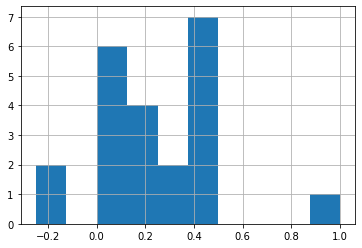

In [78]:
df.sentimiento_en[ingles & df.minecraft].hist()

In [77]:
df.textos[df.sentimiento_en > 0.75]

3     Minecraft Dungeons Best Armor – Which set shou...
35    This could be another reason lol https://t.co/...
Name: textos, dtype: object

In [79]:
# Vamos a utilizar google translate para poder utilizar TextBlob
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp37-none-any.whl size=15776 sha256=58fa40f55695a20d863a02c883451fa9f9480b4fd9761403e3e306ffef7d5ce2
  Stored in directory: /Users/corodri/Library/Caches/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [80]:
from googletrans import Translator

In [81]:
traductor = Translator()
textos[14]

'La ocupación del territorio, usos y ocupación del espacio son fundamentales para a sobrevivencia y victoria.\n\nLas h… https://t.co/bTsz0RY2lf'

In [83]:
traduccion = traductor.translate(textos[14])

In [84]:
traduccion.text

'The occupation of the territory, use and occupation of space are essential to a survival and victory.\n\nThe h ... https://t.co/bTsz0RY2lf'

In [ ]:
# Hay otra biblioteca para análisi de textos en ingéls que es VADER